In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline
from agent import Agent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from simworld import SimWorld
from config import Config

In [2]:
agent = Agent(gamma=0.95, lr=0.008, input_shape=(Config.TileEncodingConfig.tiles*(Config.TileEncodingConfig.buckets ** 4)), start_epsilon=0.1, epsilon_decay=0.96)

In [3]:
    
N = 300
T = 600
world = SimWorld()
histories = []
xs = []
ys = []
trials = np.ones((N)) * T
for episode in range(N):
    print(f"Episode {episode}")
    agent.reset_episode()

    world.set_initial_world_state()
    state0 = world.convert_internal_to_external_state()

    action0 = agent.select_action(state0.tile_encoding, use_cache=False)

    for t in range(T):  # T= timeout

        state1, reward, final = world.do_action(action0)

        agent.update(state=state0.tile_encoding, new_state=state1.tile_encoding,
                        action=action0, reward=reward, final=final)

        if final:

            trials[episode]=t
            print(f"Finished in {t} steps")
            break

        action1 = agent.select_action(state1, use_cache=True)

        state0 = state1
        action0 = action1

    # Train model
    agent.update_weights()

    histories.append(world.internal_history)
    xs.append(world.x_history)
    ys.append(world.y_history)


Episode 0
19/19 [==============================] - 0s 4ms/step - loss: 0.5174
Episode 1
1/1 [==============================] - 0s 6ms/step - loss: 0.4353
Episode 2
1/1 [==============================] - 0s 8ms/step - loss: 0.5827
Episode 3
36/36 [==============================] - 0s 6ms/step - loss: 0.2569
Episode 4
3/3 [==============================] - 0s 5ms/step - loss: 0.7808
Episode 5
27/27 [==============================] - 0s 8ms/step - loss: 0.3604
Episode 6
5/5 [==============================] - 0s 6ms/step - loss: 0.7722
Episode 7
34/34 [==============================] - 0s 5ms/step - loss: 0.3322
Episode 8
1/1 [==============================] - 0s 5ms/step - loss: 0.2195
Episode 9
15/15 [==============================] - 0s 4ms/step - loss: 0.4127
Episode 10
2/2 [==============================] - 0s 8ms/step - loss: 0.5830
Episode 11
11/11 [==============================] - 0s 5ms/step - loss: 0.4357
Episode 12
8/8 [==============================] - 0s 6ms/step - loss: 0.57

In [4]:
# a = np.array(histories[99])
heights = []
for y in ys:
    m = y[0][2]
    for j in y:
        if j[2] > m:
            m = j[2]
    heights.append(m)

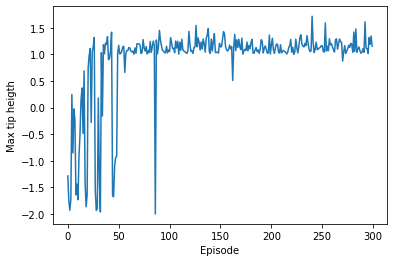

In [5]:
plt.plot(range(len(heights)), np.array(heights))
plt.xlabel('Episode') 
plt.ylabel('Max tip heigth') 
plt.show()

In [6]:
np.argmax(heights)

240

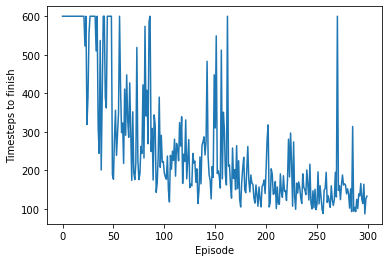

In [25]:
plt.plot(range(len(trials)), np.array(trials))
plt.xlabel('Episode') 
plt.ylabel('Timesteps to finish') 
plt.show()

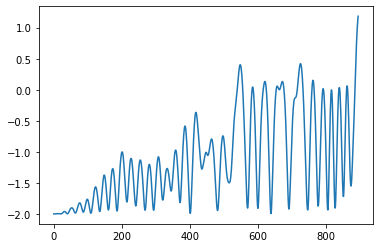

In [26]:
a = np.array(histories[120])
t = range(a.shape[0])
plt.plot(t[:4000], ((a[:4000,4])))

## Animations

In [31]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [29]:
run_no = 120
x = xs[run_no]
y = ys[run_no]

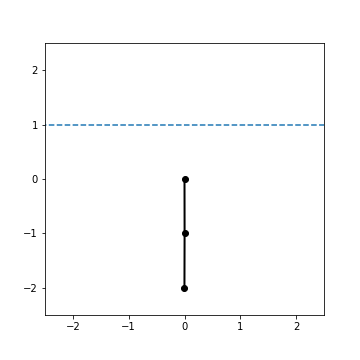

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

ax.plot((-3,3),(1,1), '--')
line = ax.plot(x[0], y[0], 'o-' , color='k', lw=2)[0]

def animate(i):
    line.set_xdata(x[i])
    line.set_ydata(y[i])
    # return line

# t = np.linspace(1, 25, 30)

anim = FuncAnimation(
    fig, animate, interval=20, frames=len(x))#, frames=len(t)-1)
# plt.axis('off')
plt.draw()
plt.show()

In [34]:
anim.save("./videos/ep120.gif", fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.
